## Import Packages

In [1]:
import json
import random
from collections import defaultdict


import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Define Functions

In [2]:
def get_file_path(json_file, image_num):
    file_path = json_file['images'][image_num]['file_name']
    return file_path


def get_annotations(json_file, image_num):
    anns = [ann for ann in json_file['annotations'] if ann['image_id'] == image_num]
    return anns


def read_image(dataset_path, file_path):
    image = cv2.imread(dataset_path + file_path, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image


def draw_bbox_from_anns(image, anns):
    for ann in anns:
        xmin, ymin, w, h = map(int, ann['bbox'])
        image = cv2.rectangle(image, (xmin, ymin), (xmin + w, ymin + h), (0, 0, 255), 3)
    return image


def make_category_dict(json_file):
    category_dict = defaultdict(int)
    for i in range(len(train_json['annotations'])):
        category = train_json['annotations'][i]['category_id']
        category_dict[str(category)] += 1
    return category_dict


def make_category_name_dict(json_file):
    category_name = {}
    for category in json_file['categories']:
        category_name[str(category['id'])] = category['name']
    return category_name


def dict_to_sorted_list(dictionary):
    sorted_list_from_dict = sorted(dictionary.items())
    return sorted_list_from_dict


def sorted_list_from_dict_to_dataframe(sorted_list_from_dict):
    dataframe = pd.DataFrame(sorted_list_from_dict, columns=['label', 'count'])
    return dataframe


def map_category_name(dataframe, category_name):
    dataframe['label'] = dataframe['label'].map(category_name)
    return dataframe


def extract_inferences_list(submission_df, image_num):
    inferences_list = submission_df['PredictionString'][image_num].split(' ')
    inferences_list = [inferences_list[i:i + 6] for i in range(0, len(inferences_list), 6)]
    return inferences_list


def draw_bbox_from_inferences_list(image, inferences_list):
    for inference in inferences_list:
        if len(inference) != 6: 
            continue
        label, probability, xmin, ymin, xmax, ymax = inference
        xmin, ymin, xmax, ymax = map(int, map(float, (xmin, ymin, xmax, ymax)))
        w, h = xmax - xmin, ymax - ymin
        image = cv2.rectangle(image, (xmin, ymin), (xmin + w, ymin + h), (0, 0, 255), 3)
    return image

## Load Json File

In [3]:
with open('./dataset/train.json', 'r') as f:
    train_json = json.load(f)
    
dataset_path = './dataset/'

## Plot BBox

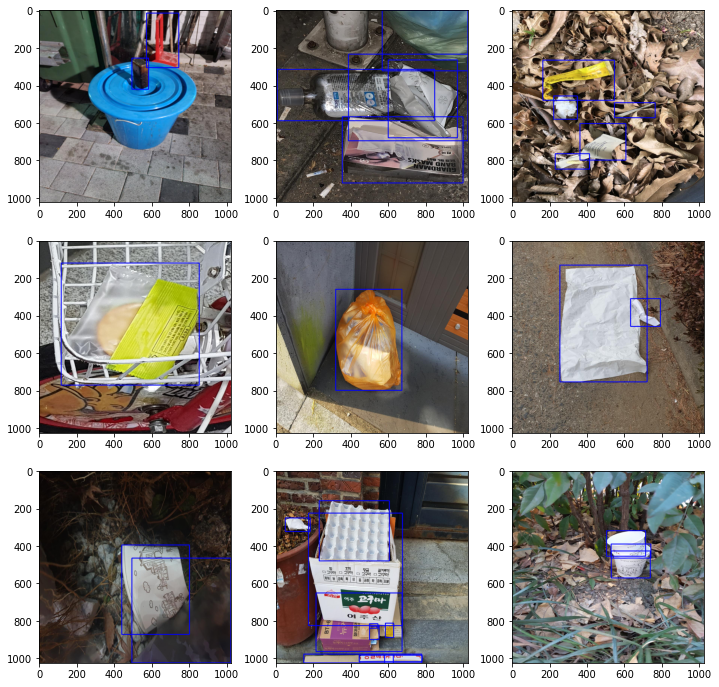

In [4]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

for i in range(9):
    image_num = random.randint(0, len(train_json['images']) - 1)
    file_path = get_file_path(train_json, image_num)
    anns = get_annotations(train_json, image_num)
    image = read_image(dataset_path, file_path)
    bbox_image = draw_bbox_from_anns(image, anns)
    
    x, y = i // 3, i % 3
    axes[x][y].imshow(bbox_image)

plt.show()

## Plot Class Distribution

In [5]:
category_dict = make_category_dict(train_json)
category_name = make_category_name_dict(train_json)
category_list = dict_to_sorted_list(category_dict)
category_df = sorted_list_from_dict_to_dataframe(category_list)
category_df = map_category_name(category_df, category_name)

<AxesSubplot:xlabel='label', ylabel='count'>

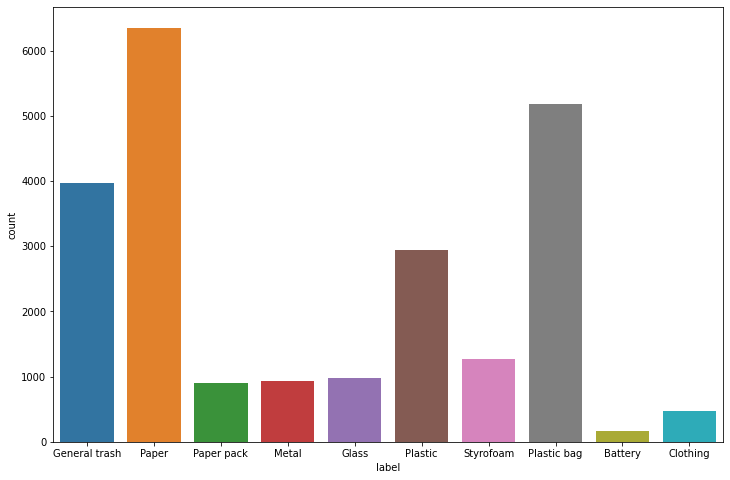

In [6]:
plt.figure(figsize = (12,8))
sns.barplot(x='label', y='count', data=category_df)

## Read Submission File

In [7]:
submission_df = pd.read_csv('./submission.csv')

## Plot Submission BBox

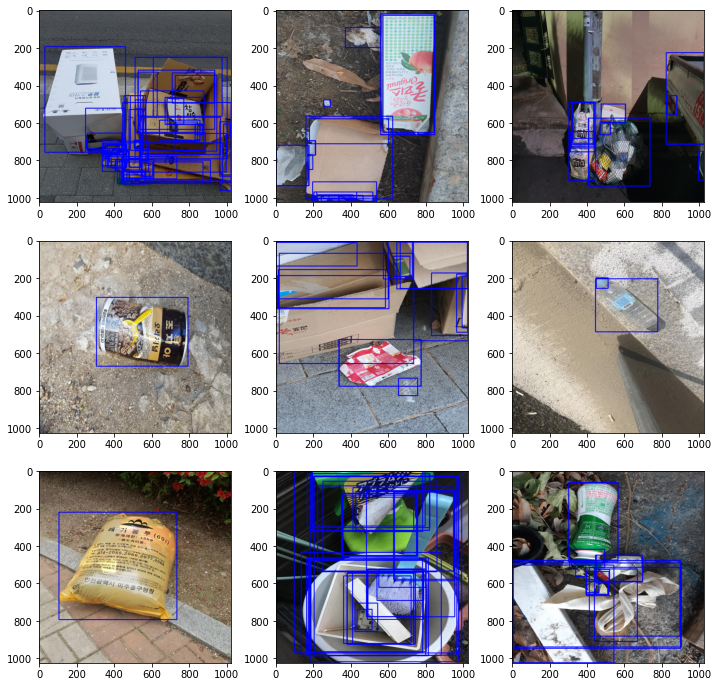

In [8]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

for i in range(9):
    image_num = random.randint(0, len(train_json['images']) - 1)
    image = read_image(dataset_path, submission_df['image_id'][image_num])
    inferences_list = extract_inferences_list(submission_df, image_num)
    bbox_image = draw_bbox_from_inferences_list(image, inferences_list)

    x, y = i // 3, i % 3
    axes[x][y].imshow(bbox_image)

plt.show()